In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('/content/ai_impact_student_performance_dataset.csv')

In [3]:
data.head()

,student_id,age,gender,grade_level,study_hours_per_day,uses_ai,ai_usage_time_minutes,ai_tools_used,ai_usage_purpose,ai_dependency_score,...,concept_understanding_score,study_consistency_index,improvement_rate,sleep_hours,social_media_hours,tutoring_hours,class_participation_score,final_score,passed,performance_category
0,1,20,Female,1st Year,2.5,1,170,NaN,Exam Prep,10,...,4,9.0,8.1,7.2,1.5,4.6,6,36.8,0,Low
1,2,17,Male,12th,3.4,1,123,NaN,Notes,4,...,8,8.5,13.8,7.6,5.1,2.7,6,65.5,1,Medium
2,3,24,Male,3rd Year,0.8,0,35,Copilot,Doubt Solving,8,...,7,2.1,39.1,5.7,0.2,4.0,3,66.3,1,Medium
3,4,21,Female,12th,4.4,0,45,ChatGPT+Gemini,Notes,3,...,5,6.7,25.2,8.2,4.2,2.9,2,69.5,1,Medium
4,5,18,Other,3rd Year,3.5,1,21,ChatGPT+Gemini,Coding,2,...,5,5.4,2.7,8.7,0.2,2.9,2,49.7,1,Low


In [4]:
data['grade_level'].unique()

array(['1st Year', '12th', '3rd Year', '10th', '11th', '2nd Year'],
      dtype=object)

In [5]:
grade={
    '1st Year':13,
    '12th':12,
    '3rd Year':15,
    '10th':10,
    '11th':11,
    '2nd Year':14
}

In [6]:
data['grade_level_num']=data['grade_level'].map(grade)

In [7]:
data['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [8]:
gender={
    'Male':1,
    'Female':0,
    'Other':2
}

In [9]:
data['gender_label']=data['gender'].map(gender)

In [10]:
data['ai_tools_used'].unique()

array([nan, 'Copilot', 'ChatGPT+Gemini', 'ChatGPT', 'Gemini', 'Claude'],
      dtype=object)

In [11]:
ai_tool={
    'nan':0,
    'Copilot':1,
    'ChatGPT+Gemini':2,
    'ChatGPT':3,
    'Gemini':4,
    'Claude':5
}

In [12]:
data['ai_tools_used_label']=data['ai_tools_used'].map(ai_tool)

In [13]:
data['ai_usage_purpose'].unique()

array(['Exam Prep', 'Notes', 'Doubt Solving', 'Coding', nan, 'Homework'],
      dtype=object)

In [14]:
purpose={
    'Exam Prep':0,
    'Notes':1,
    'Doubt Solving':2,
    'Coding':3,
    'nan':4,
    'Homework':5
}

In [15]:
data['ai_usage_purpose_label']=data['ai_usage_purpose'].map(purpose)

In [16]:
data['performance_category'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [17]:
category={
    'Low':0,
    'Medium':1,
    'High':2
}

In [18]:
data['category']=data['performance_category'].map(category)

In [19]:
data.head()

,student_id,age,gender,grade_level,study_hours_per_day,uses_ai,ai_usage_time_minutes,ai_tools_used,ai_usage_purpose,ai_dependency_score,...,tutoring_hours,class_participation_score,final_score,passed,performance_category,grade_level_num,gender_label,ai_tools_used_label,ai_usage_purpose_label,category
0,1,20,Female,1st Year,2.5,1,170,NaN,Exam Prep,10,...,4.6,6,36.8,0,Low,13,0,NaN,0.0,0
1,2,17,Male,12th,3.4,1,123,NaN,Notes,4,...,2.7,6,65.5,1,Medium,12,1,NaN,1.0,1
2,3,24,Male,3rd Year,0.8,0,35,Copilot,Doubt Solving,8,...,4.0,3,66.3,1,Medium,15,1,1.0,2.0,1
3,4,21,Female,12th,4.4,0,45,ChatGPT+Gemini,Notes,3,...,2.9,2,69.5,1,Medium,12,0,2.0,1.0,1
4,5,18,Other,3rd Year,3.5,1,21,ChatGPT+Gemini,Coding,2,...,2.9,2,49.7,1,Low,15,2,2.0,3.0,0


In [20]:
dt=data.drop(['student_id','grade_level','gender','ai_tools_used','ai_usage_purpose','performance_category'],axis=1)

In [21]:
dt.head()

,age,study_hours_per_day,uses_ai,ai_usage_time_minutes,ai_dependency_score,ai_generated_content_percentage,ai_prompts_per_week,ai_ethics_score,last_exam_score,assignment_scores_avg,...,social_media_hours,tutoring_hours,class_participation_score,final_score,passed,grade_level_num,gender_label,ai_tools_used_label,ai_usage_purpose_label,category
0,20,2.5,1,170,10,29,56,5,29,40.9,...,1.5,4.6,6,36.8,0,13,0,NaN,0.0,0
1,17,3.4,1,123,4,14,65,1,60,87.2,...,5.1,2.7,6,65.5,1,12,1,NaN,1.0,1
2,24,0.8,0,35,8,82,8,5,98,77.1,...,0.2,4.0,3,66.3,1,15,1,1.0,2.0,1
3,21,4.4,0,45,3,74,106,10,67,86.4,...,4.2,2.9,2,69.5,1,12,0,2.0,1.0,1
4,18,3.5,1,21,2,83,7,10,40,69.4,...,0.2,2.9,2,49.7,1,15,2,2.0,3.0,0


In [22]:
dt.dropna(inplace=True)

In [23]:
dt

,age,study_hours_per_day,uses_ai,ai_usage_time_minutes,ai_dependency_score,ai_generated_content_percentage,ai_prompts_per_week,ai_ethics_score,last_exam_score,assignment_scores_avg,...,social_media_hours,tutoring_hours,class_participation_score,final_score,passed,grade_level_num,gender_label,ai_tools_used_label,ai_usage_purpose_label,category
2,24,0.8,0,35,8,82,8,5,98,77.1,...,0.2,4.0,3,66.3,1,15,1,1.0,2.0,1
3,21,4.4,0,45,3,74,106,10,67,86.4,...,4.2,2.9,2,69.5,1,12,0,2.0,1.0,1
4,18,3.5,1,21,2,83,7,10,40,69.4,...,0.2,2.9,2,49.7,1,15,2,2.0,3.0,0
5,20,5.1,1,34,10,24,95,6,43,98.9,...,3.7,2.1,4,77.9,1,13,1,1.0,3.0,2
7,16,5.5,0,174,4,42,70,6,42,57.7,...,0.4,2.5,6,52.7,1,15,1,3.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,15,4.8,0,36,8,97,88,4,44,66.4,...,3.2,3.6,10,53.4,1,10,0,4.0,1.0,1
7994,23,3.5,1,39,4,84,56,7,26,54.7,...,3.6,4.3,2,39.8,0,11,1,3.0,5.0,0
7996,21,3.3,0,63,10,83,8,2,74,58.8,...,1.3,2.9,5,58.4,1,13,2,5.0,0.0,1
7997,24,1.6,0,113,5,23,100,8,87,42.5,...,3.5,0.1,9,69.1,1,15,1,3.0,3.0,1


In [24]:
dt.columns

Index(['age', 'study_hours_per_day', 'uses_ai', 'ai_usage_time_minutes',
       'ai_dependency_score', 'ai_generated_content_percentage',
       'ai_prompts_per_week', 'ai_ethics_score', 'last_exam_score',
       'assignment_scores_avg', 'attendance_percentage',
       'concept_understanding_score', 'study_consistency_index',
       'improvement_rate', 'sleep_hours', 'social_media_hours',
       'tutoring_hours', 'class_participation_score', 'final_score', 'passed',
       'grade_level_num', 'gender_label', 'ai_tools_used_label',
       'ai_usage_purpose_label', 'category'],
      dtype='object')

In [25]:
sns.set_theme(
    style="whitegrid",
    context="talk",
    palette="Set2"
)

plt.rcParams.update({
    "figure.figsize": (10, 6),
    "axes.titlesize": 16,
    "axes.labelsize": 13,
    "legend.fontsize": 11,
    "axes.titleweight": "bold"
})


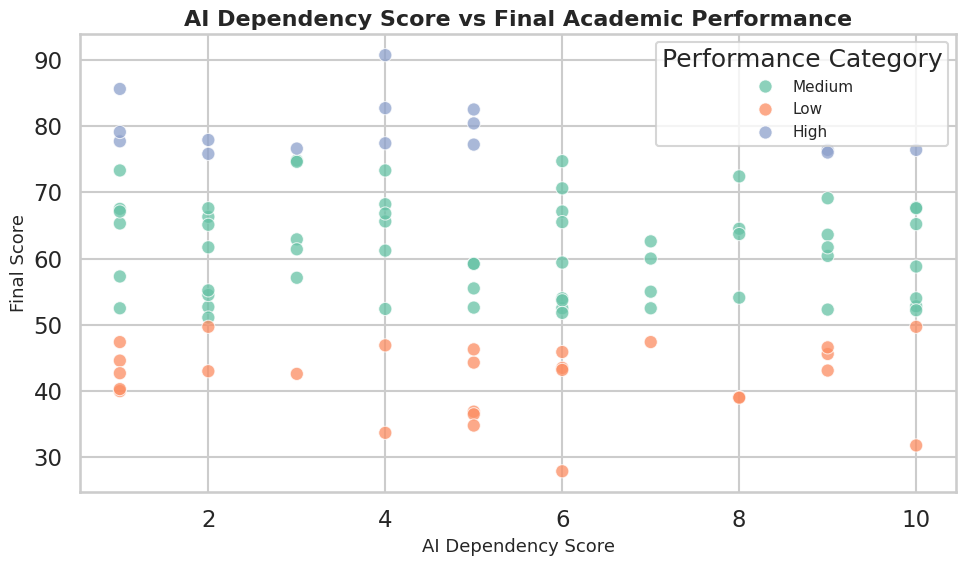

In [52]:
sns.scatterplot(
    data=data[300:400],
    x='ai_dependency_score',
    y='final_score',
    hue='performance_category',
    alpha=0.75,
    s=90
)

plt.title('AI Dependency Score vs Final Academic Performance')
plt.xlabel('AI Dependency Score')
plt.ylabel('Final Score')
plt.legend(title='Performance Category')
plt.tight_layout()
plt.show()


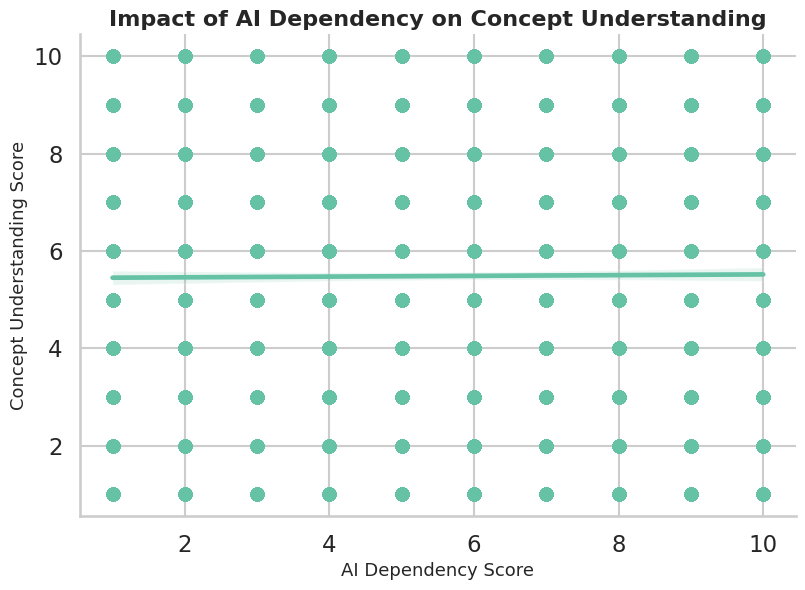

In [55]:
sns.lmplot(
    data=dt,
    x='ai_dependency_score',
    y='concept_understanding_score',
    height=6,
    aspect=1.4,
    scatter_kws={'alpha':0.6}
)

plt.title('Impact of AI Dependency on Concept Understanding')
plt.xlabel('AI Dependency Score')
plt.ylabel('Concept Understanding Score')
plt.show()


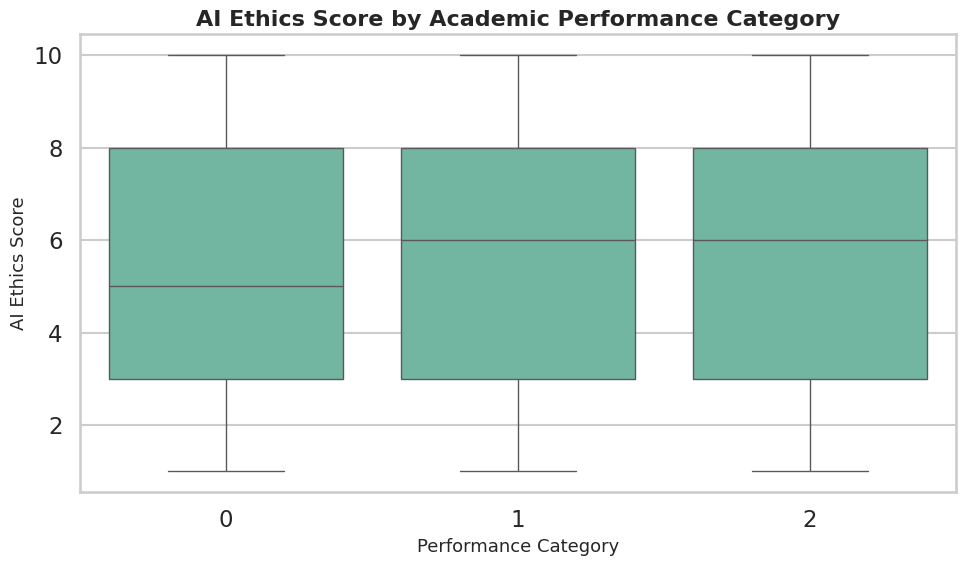

In [28]:
sns.boxplot(
    data=dt,
    x='category',
    y='ai_ethics_score'
)

plt.title('AI Ethics Score by Academic Performance Category')
plt.xlabel('Performance Category')
plt.ylabel('AI Ethics Score')
plt.tight_layout()
plt.show()


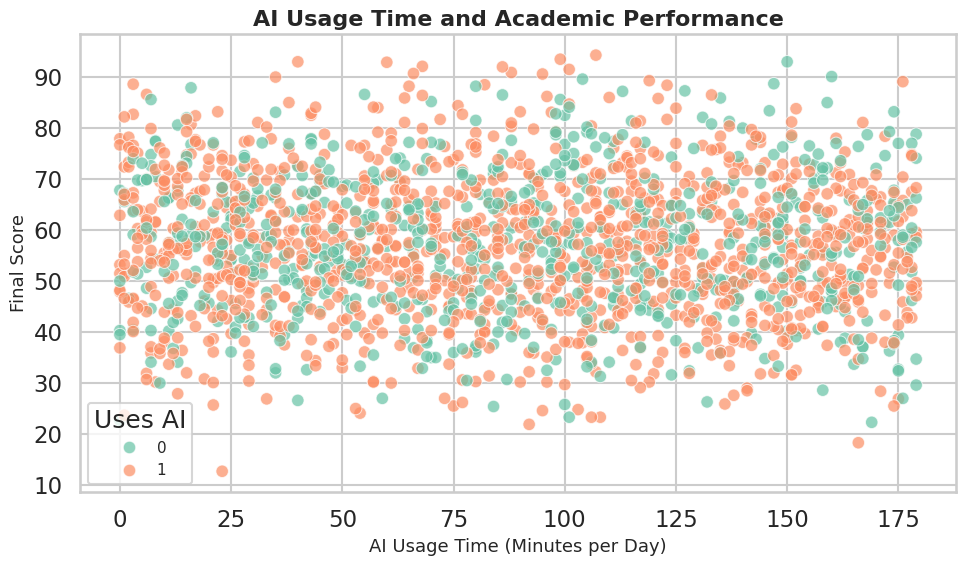

In [65]:
sns.scatterplot(
    data=dt[:2000],
    x='ai_usage_time_minutes',
    y='final_score',
    hue='uses_ai',
    alpha=0.7
)

plt.title('AI Usage Time and Academic Performance')
plt.xlabel('AI Usage Time (Minutes per Day)')
plt.ylabel('Final Score')
plt.legend(title='Uses AI')
plt.tight_layout()
plt.show()


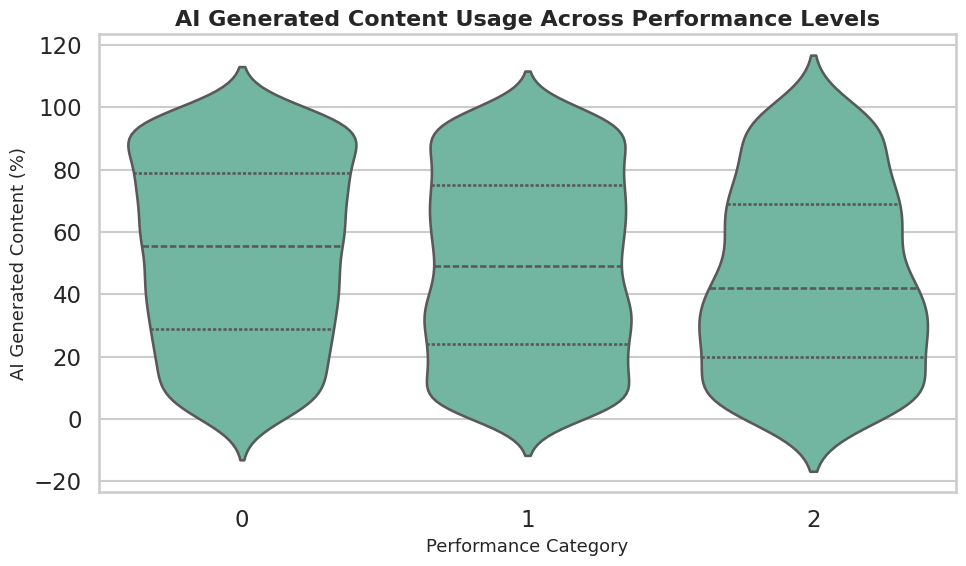

In [66]:
sns.violinplot(
    data=dt,
    x='category',
    y='ai_generated_content_percentage',
    inner='quartile'
)

plt.title('AI Generated Content Usage Across Performance Levels')
plt.xlabel('Performance Category')
plt.ylabel('AI Generated Content (%)')
plt.tight_layout()
plt.show()


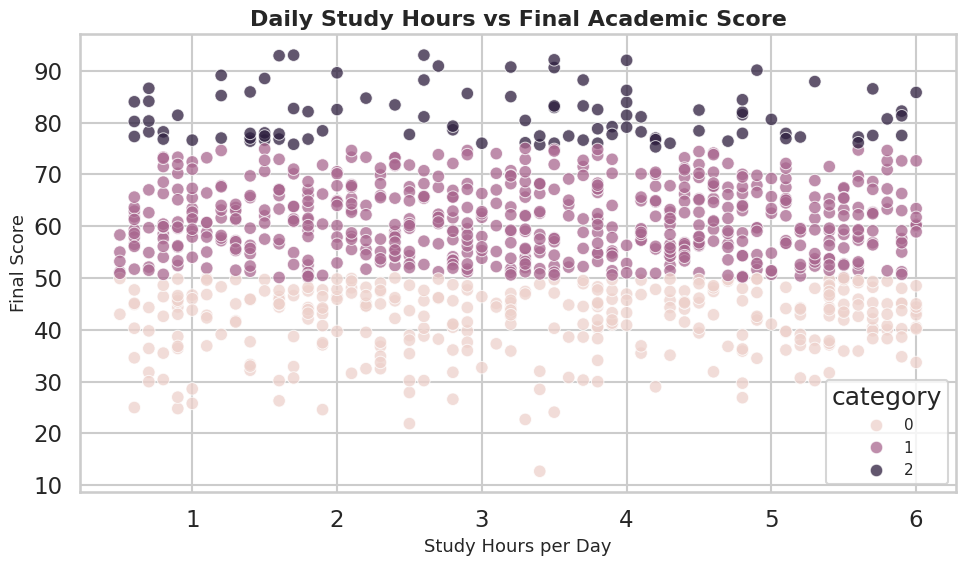

In [70]:
sns.scatterplot(
    data=dt[:1000],
    x='study_hours_per_day',
    y='final_score',
    hue='category',
    alpha=0.75
)

plt.title('Daily Study Hours vs Final Academic Score')
plt.xlabel('Study Hours per Day')
plt.ylabel('Final Score')
plt.tight_layout()
plt.show()


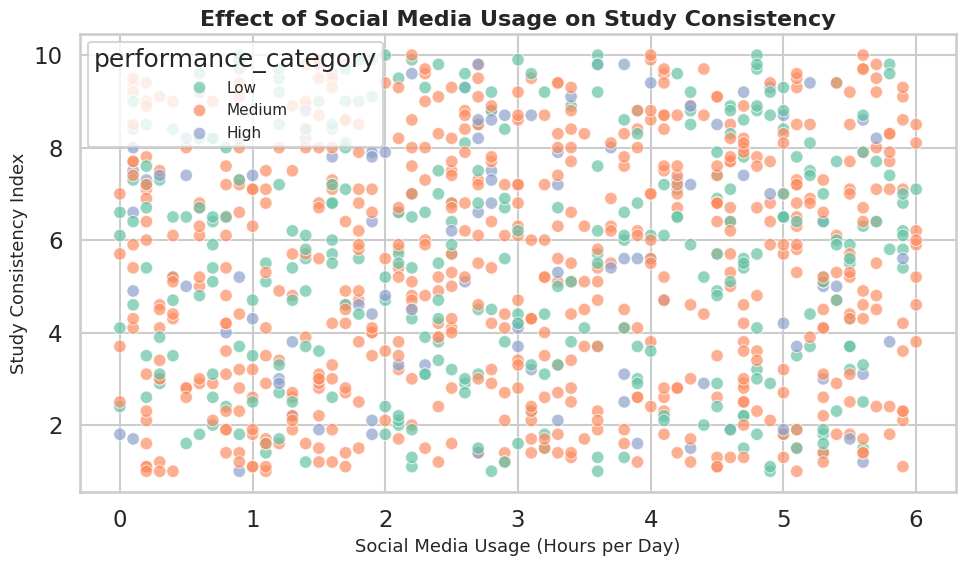

In [73]:
sns.scatterplot(
    data=data[:1000],
    x='social_media_hours',
    y='study_consistency_index',
    hue='performance_category',
    alpha=0.7
)

plt.title('Effect of Social Media Usage on Study Consistency')
plt.xlabel('Social Media Usage (Hours per Day)')
plt.ylabel('Study Consistency Index')
plt.tight_layout()
plt.show()


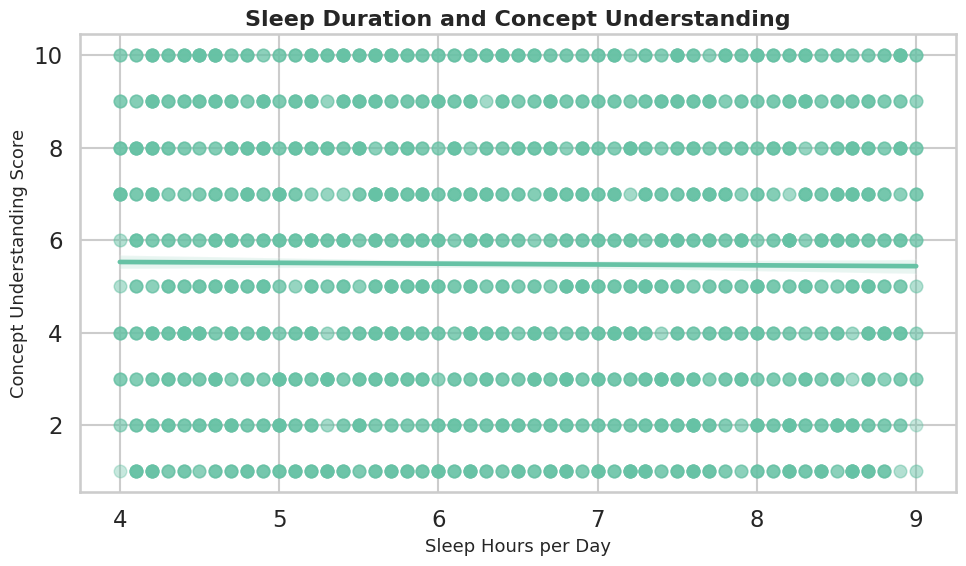

In [77]:
sns.regplot(
    data=dt,
    x='sleep_hours',
    y='concept_understanding_score',
    scatter_kws={'alpha':0.2}
)

plt.title('Sleep Duration and Concept Understanding')
plt.xlabel('Sleep Hours per Day')
plt.ylabel('Concept Understanding Score')
plt.tight_layout()
plt.show()


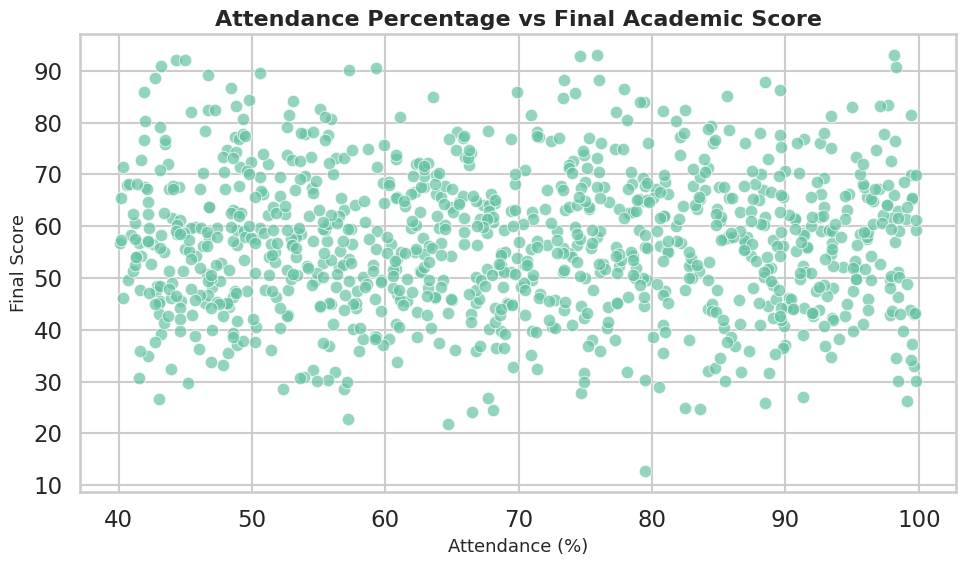

In [80]:
sns.scatterplot(
    data=dt[:1000],
    x='attendance_percentage',
    y='final_score',
    alpha=0.7
)

plt.title('Attendance Percentage vs Final Academic Score')
plt.xlabel('Attendance (%)')
plt.ylabel('Final Score')
plt.tight_layout()
plt.show()


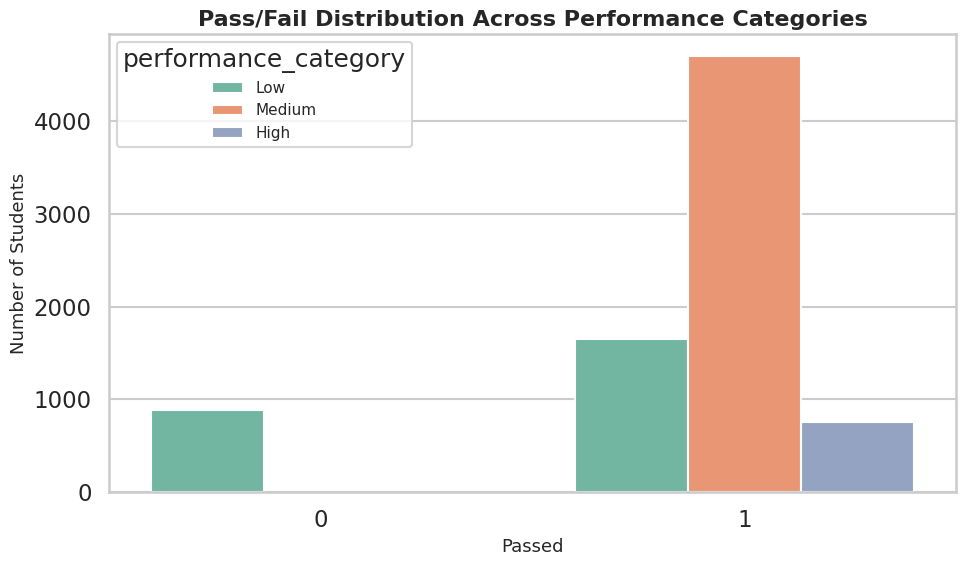

In [82]:
sns.countplot(
    data=data,
    x='passed',
    hue='performance_category'
)

plt.title('Pass/Fail Distribution Across Performance Categories')
plt.xlabel('Passed')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()


In [36]:
x=dt.drop(['category'],axis=1)
y=dt['category']

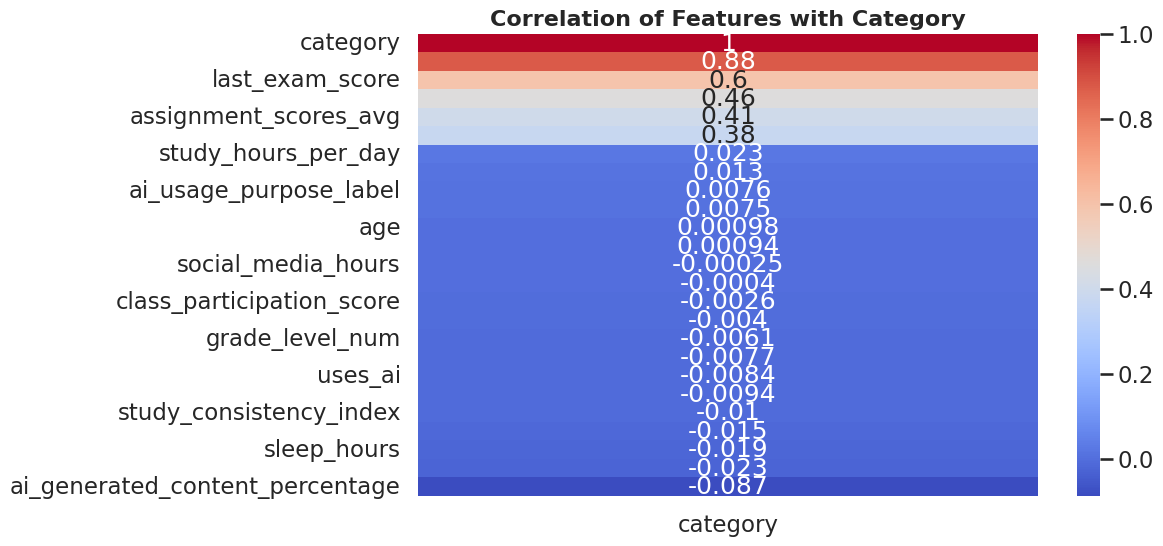

In [83]:
corr = dt.corr(numeric_only=True)
sns.heatmap(corr[['category']].sort_values(by='category', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Category')
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
X_train.shape

(4416, 24)

In [41]:
y_train.shape

(4416,)

In [42]:
X_test.shape

(1104, 24)

In [43]:
y_test.shape

(1104,)

In [44]:
# Train models
linearregression = LinearRegression()
decisiontreeregression = DecisionTreeRegressor()
supportvectorregression = SVR(kernel='rbf')
randomforestregression = RandomForestRegressor()
xgbregression = XGBRegressor()

linearregression.fit(X_train, y_train)
decisiontreeregression.fit(X_train, y_train)
supportvectorregression.fit(X_train, y_train)
randomforestregression.fit(X_train, y_train)
xgbregression.fit(X_train, y_train)

# Make predictions
y_lin = linearregression.predict(X_test)
y_dectree = decisiontreeregression.predict(X_test)
y_supvec = supportvectorregression.predict(X_test)
y_randfor = randomforestregression.predict(X_test)
y_xgb = xgbregression.predict(X_test)

# Evaluate models
data1 = {
        "Linear Regression":r2_score(y_test, y_lin)*100,
        "Decision Tree Regression":r2_score(y_test, y_dectree)*100,
        "Support Vector Regression":r2_score(y_test, y_supvec)*100,
        "Random Forest Classifier":r2_score(y_test, y_randfor)*100,
        "XGB Regression":r2_score(y_test, y_xgb)*100
}

In [45]:
data1

{'Linear Regression': 76.99924977187293,
 'Decision Tree Regression': 100.0,
 'Support Vector Regression': 75.73609918598706,
 'Random Forest Classifier': 100.0,
 'XGB Regression': 99.126535654068}

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(16, activation='relu'),

    Dense(1)  # Regression output
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,225 (16.50 KB)

 Trainable params: 4,225 (16.50 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 28.5903 - mae: 3.7649 - val_loss: 0.7985 - val_mae: 0.7326
Epoch 2/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.9133 - mae: 1.0524 - val_loss: 0.4547 - val_mae: 0.5679
Epoch 3/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.9928 - mae: 0.7201 - val_loss: 0.4129 - val_mae: 0.5502
Epoch 4/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6778 - mae: 0.6329 - val_loss: 0.3550 - val_mae: 0.5104
Epoch 5/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5134 - mae: 0.5636 - val_loss: 0.3490 - val_mae: 0.5160
Epoch 6/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5038 - mae: 0.5487 - val_loss: 0.3375 - val_mae: 0.5113
Epoch 7/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4408 - mae: 0.5234 - val_loss: 0.3194 - val_mae: 0.4989
Epoch 8/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4125 - mae: 0.4888 - val_loss: 0.2982 - val_mae: 0.4795
Epoch 9/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - 

In [48]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
#rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R² Score:", r2)
#print("RMSE:", rmse)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
R² Score: 0.3876461982727051
